Mounting Google Drive




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports


1.   Panda: Data Reading
2.   NumPy: Data Manipulation 
3.   SkLearn: Split the data into training and testing
4.   MatPlotLib: Plotting Graph






In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

DataSet Read

In [3]:
dataset=pd.read_csv("/content/drive/My Drive/NLP_Assigment_1/housing.csv")
dataset=dataset.dropna()
#Print the top 10 entries
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
dataset.shape

(20433, 10)

Plot a sample of the dataset using subplots and save the figure

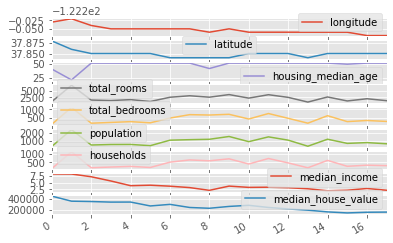

In [5]:
plt.style.use("ggplot")
dataset.head(18).plot(subplots=True)
plt.savefig('/content/drive/My Drive/NLP_Assigment_1/Subplot.png', format='png', dpi=1200)

In [0]:
#Variable to be predicted median_house_value
Y=dataset['median_house_value']
#Remaining of the columns form longitude to median_income
X=dataset.loc[:,'longitude':'median_income']

Split the dataset and convert to NumPy

In [0]:
#Split the dataset in 70:30 ratio and set the random state to 2003
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2003)

#Convert the data to NumPy
x_train_np=x_train.to_numpy()
x_test_np=x_test.to_numpy()
y_train_np=y_train.to_numpy()
y_test_np=y_test.to_numpy()

Import the PyTorch libraries


In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import BatchNorm1d
from torch.nn import Dropout
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.nn.functional import leaky_relu
from torch.nn.functional import softmax
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

Model Defination

In [0]:
#CnnRegressor Inherit the torch.nn.Module
class CnnRegressor(torch.nn.Module):
  def __init__(self,batch_size,inputs,outputs):
    #Initialization
    super(CnnRegressor,self).__init__()
    self.batch_size=batch_size
    self.inputs=inputs
    self.outputs=outputs
    
    #Batch Normalization
    self.batch_normaliztion_1=BatchNorm1d(inputs)
    #Convolution Layer(input channels,output channels,kernel size)
    self.input_layer=Conv1d(inputs,batch_size,1)
    #MaxPooling Layer
    self.max_pooling_layer_1=MaxPool1d(1)
    #Convolution Layer(input channels,output channels,kernel size)
    self.conv_layer=Conv1d(batch_size,128,1)
    #MaxPooling Layer(kernel size)
    self.max_pooling_layer_2=MaxPool1d(1)

    #Flatten Layer
    self.flatten_layer=Flatten()
    #Linear Layer(input channels,output channels)
    self.linear_layer=Linear(128,64)
    #Output Layer(input channels,output channels)
    self.output_layer=Linear(64,outputs)

  #Function to feed input through the model
  def feed(self,input):
    
    #Reshaping the input is required as Conv1d Layer expectes a 3D input
    input=input.reshape((self.batch_size,self.inputs,1))
    #Batch Normalization
    output=self.batch_normaliztion_1(input)

    #Convolution Layer -> LeakyReLU function-> MaxPooling Layer
    output=leaky_relu(self.input_layer(output))
    output=self.max_pooling_layer_1(output)

    #Convolution Layer -> LeakyReLU function-> MaxPooling Layer
    output=leaky_relu(self.conv_layer(output))
    output=self.max_pooling_layer_2(output)

    #Flatten->Linear Layer -> Linear Layer
    output=self.flatten_layer(output)
    output=self.linear_layer(output)
    output=self.output_layer(output)
    return output



Optimizers and Performance Measure Imports

In [10]:
from torch.optim import SGD
from torch.optim import Adam
from torch.nn import L1Loss
from torch.nn import MSELoss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 3.6MB/s 


Model Initialization

In [11]:
batch_size=64
#CnnRegressor(batchsize,inputsize,outputseize)
model=CnnRegressor(batch_size,X.shape[1],1)
#Enable GPU for model
model.cuda()

CnnRegressor(
  (batch_normaliztion_1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer_1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer_2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [12]:
model.eval

<bound method Module.eval of CnnRegressor(
  (batch_normaliztion_1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer_1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer_2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)>

Function to run batches of data through the model

In [0]:
def model_loss(model,dataset,train=False,optimizer=None):

  performance=L1Loss()
  meansquareperf=MSELoss()
  score_metric= R2Score()
  avg_loss=0
  avg_meansquareloss=0
  avg_score=0
  count=0

  for input,output in iter(dataset):
    #Get the model prediction for the training dataset
    predictions=model.feed(input)
    #Get model Loss
    loss=performance(predictions,output)
    meansquareloss=meansquareperf(predictions,output)
    #Get Model R^2Score
    score_metric.update([predictions,output])
    score = score_metric.compute()
    if(train):
      #Clear the errors to they do not cummulate
      optimizer.zero_grad()
      #Compute the gradient for the optimizer
      loss.backward()
      #Update the model parameters based on the gradient using the optimizer
      optimizer.step()
    
    #Store the Loss and R2Score and update the counter
    avg_loss+=loss.item()
    avg_meansquareloss+=meansquareloss.item()
    avg_score+=score
    count+=1

  return avg_loss/count, avg_score/count ,avg_meansquareloss/count

Train the Model

In [14]:
epochs=100
#Define the performance measure and optimizer
optimizer=Adam(model.parameters(),lr=1e-2)

#Convert the tarining set to torch variable for out model using the GPU as floats. The reshape is to remove a warning
inputs=torch.from_numpy(x_train_np).cuda().float()
outputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

#Create DataLoader Instance to work with our batches
tensor= TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
#Define Arrays to store the loss, r2score and epoch
lossData=[]
R2ScoreData=[]
epochData=[]

#Start the training loop
for epoch in range(epochs):
  #Cycle through the batches and get the avgerage loss and r2score
  avg_loss,avg_r2_score,avg_meansquareloss =model_loss(model,loader,train=True,optimizer=optimizer)
  #Ouput
  print("Epoch " +str(epoch + 1)+ ":\n\tMSE= " +str(avg_meansquareloss)+ ":\n\tLoss= " +str(avg_loss)+ "\n\tR^2 Score= " +str(avg_r2_score))
  #Append the value for each epoch
  epochData.append(epoch+1)
  lossData.append(avg_loss)
  R2ScoreData.append(avg_r2_score)


Epoch 1:
	MSE= 17516897757.56054:
	Loss= 93548.12188200673
	R^2 Score= -1.4489732730081852
Epoch 2:
	MSE= 5001361959.03139:
	Loss= 49819.224460482066
	R^2 Score= 0.6194514736900252
Epoch 3:
	MSE= 4934357844.376681:
	Loss= 49031.953256376124
	R^2 Score= 0.6240894427980118
Epoch 4:
	MSE= 4895686327.67713:
	Loss= 48957.55015940303
	R^2 Score= 0.6387803319489038
Epoch 5:
	MSE= 4805294531.730942:
	Loss= 48244.57789728139
	R^2 Score= 0.6160701246973607
Epoch 6:
	MSE= 4757635086.923767:
	Loss= 47915.0543634389
	R^2 Score= 0.6281302686625991
Epoch 7:
	MSE= 4666613657.8295965:
	Loss= 47520.68802550448
	R^2 Score= 0.6426509362141798
Epoch 8:
	MSE= 4698744322.869955:
	Loss= 47719.05021195347
	R^2 Score= 0.6565666895770604
Epoch 9:
	MSE= 4473414099.8026905:
	Loss= 46442.77100266256
	R^2 Score= 0.667499289148942
Epoch 10:
	MSE= 4546212388.161435:
	Loss= 46939.18947940022
	R^2 Score= 0.6608544845099688
Epoch 11:
	MSE= 4397431539.372197:
	Loss= 46189.907949131164
	R^2 Score= 0.6630897919280914
Epoch 

Plot L1Loss and R2Score for each Epoch

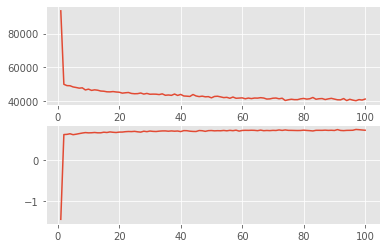

In [15]:
fig,(ax1,ax2) =plt.subplots(nrows=2,ncols=1)
ax1.plot(epochData,lossData)
ax2.plot(epochData,R2ScoreData)

Test the Model

In [16]:
#Convert the tarining set to torch variable for out model using the GPU as floats. The reshape is to remove a warning
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

#Create DataLoader Instance to work with our batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle = True, drop_last = True)

#Ouput the average performance of the model
avg_loss, avg_r2_score,avg_meansquareloss = model_loss(model, loader,train=False)
print("The model's MSE loss is: " + str(avg_meansquareloss))
print("The model's L1 loss is: " + str(avg_loss))
print("The model's R^2 score is: " + str(avg_r2_score))


The model's MSE loss is: 3564752723.536842
The model's L1 loss is: 40851.467269736844
The model's R^2 score is: 0.731382949152275


Save the Model

In [0]:
#Saving model
model_save_name = '0892691_1dconv_reg.pt'
path = F"//content/drive/My Drive/NLP_Assigment_1/0892691_1dconv_reg" 
torch.save(model.state_dict(), path)